In [1]:
#Importing packages

import pandas as pd
import numpy as np
import seaborn as se
import datetime as dt

In [2]:
#Getting all the sheets 

df1 = pd.read_excel("Case_Study.xlsx", sheet_name = "User Gameplay data")
df2 = pd.read_excel("Case_Study.xlsx", sheet_name = "Deposit Data")
df3 = pd.read_excel("Case_Study.xlsx", sheet_name = "Withdrawal Data")

games, deposit, withdraw = df1.copy(), df2.copy(), df3.copy()

In [3]:
#The day of the process

games["days"] = pd.to_datetime(games["Datetime"]).dt.day
deposit["days"] = pd.to_datetime(deposit["Datetime"]).dt.day
withdraw["days"] = pd.to_datetime(withdraw["Datetime"]).dt.day

In [4]:
#The hour of the process

games["hours"] = pd.to_datetime(games["Datetime"]).dt.hour
deposit["hours"] = pd.to_datetime(deposit["Datetime"]).dt.hour
withdraw["hours"] = pd.to_datetime(withdraw["Datetime"]).dt.hour

In [5]:
#Renaming the columns to make it easier

games.rename(columns = {'User ID':'user_id', 'Games Played':'games_played', 'Datetime':'datetime'}, inplace = True)
deposit.rename(columns = {'User Id':'user_id', 'Datetime':'datetime', 'Amount':'deposit_amount'}, inplace = True)
withdraw.rename(columns = {'User Id':'user_id', 'Datetime':'datetime', 'Amount':'withdraw_amount'}, inplace = True)

In [6]:
#We only need hours to specify slots s1, s2 
#We have s1, s2 where s1 is from 0am to 12pm and s2 is from 12pm to 0am

#games table  
s1_game = games[games["hours"]<12].groupby('user_id').sum()['games_played']
s2_game = games[games["hours"]>=12].groupby('user_id').sum()['games_played']

#deposit table 
s1_depo = deposit[deposit["hours"]<12].groupby('user_id').sum()["deposit_amount"]
s2_depo = deposit[deposit["hours"]>=12].groupby('user_id').sum()["deposit_amount"]

#withdraw table 
s1_with = withdraw[withdraw["hours"]<12].groupby('user_id').sum()["withdraw_amount"]
s2_with = withdraw[withdraw["hours"]<12].groupby('user_id').sum()["withdraw_amount"]

In [7]:
#first slot 
s1 = pd.concat([s1_game, s1_depo, s1_with], axis=1)

#max deposits per player 
s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]

#max withdrawals per player
s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]

#fill s1 null as zero 
s1 = s1.fillna(0)

#second slot
s2 = pd.concat([s2_game, s2_depo, s2_with], axis=1)
s2["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
s2["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]

#fill s2 null as zero 
s2 = s2.fillna(0)

C:\Users\shard\AppData\Local\Temp\ipykernel_2348\3459855003.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\3459855003.py:8: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\3459855003.py:15: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s2["max_deposit"] = dep

In [8]:
def day_slots(d) : 
    s1_game = games[(games["hours"]<12) & (games["days"]==d)].groupby('user_id').sum()['games_played']
    s2_game = games[(games["hours"]>=12) & (games["days"]==d)].groupby('user_id').sum()['games_played']
    
    #deposit table 
    s1_depo = deposit[(deposit["hours"]<12) & (deposit["days"]==d)].groupby('user_id').sum()["deposit_amount"]
    s2_depo = deposit[(deposit["hours"]>=12) & (deposit["days"]==d)].groupby('user_id').sum()["deposit_amount"]
    
    #withdraw table 
    s1_with = withdraw[(withdraw["hours"]<12) & (withdraw["days"]==d)].groupby('user_id').sum()["withdraw_amount"]
    s2_with = withdraw[(withdraw["hours"]>=12) & (withdraw["days"]==d)].groupby('user_id').sum()["withdraw_amount"]
    
    #first slot 
    s1 = pd.concat([s1_game,s1_depo,s1_with],axis=1)
    
    #max deposits per player
    s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
    
    #max withdrawals per player 
    s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
    
    #fill s1 null as 0
    s1 = s1.fillna(0)
    
    #second slot 
    s2 = pd.concat([s2_game, s2_depo, s2_with], axis=1)
    s2["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
    s2["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
    
    #fill s2 null as 0
    s2 = s2.fillna(0)
    
    #loyalty_points for s1
    s1["loyalty_points_s1"] = ((0.01*s1["deposit_amount"])+
                       (0.005*s1["withdraw_amount"])+
                       (0.001*(s1["max_deposit"]-s1["max_withdraw"]))+
                       (0.2*s1["games_played"]))
    
    #loyalty_points for s2
    s2["loyalty_points_s2"] = ((0.01*s2["deposit_amount"])+
                       (0.005*s2["withdraw_amount"])+
                       (0.001*(s2["max_deposit"]-s2["max_withdraw"]))+
                       (0.2*s2["games_played"]))

    return s1,s2

# Part A: Calculating Royalty Points

**Q1. Playerwise loyalty points earned by players in the following slots:**

**a. 2nd October Slot S1**

In [9]:
s1_2nd, s2_2nd = day_slots(2)
s1_2nd.head()

C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:17: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:27: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s2["max_deposit"] = d

,games_played,deposit_amount,withdraw_amount,max_deposit,max_withdraw,loyalty_points_s1
user_id,,,,,,
1,0.0,0.0,0.0,5000,0.0,5.00
2,0.0,0.0,0.0,50000,123700.0,-73.70
3,0.0,0.0,0.0,10000,0.0,10.00
4,0.0,0.0,0.0,1750,0.0,1.75
5,0.0,0.0,0.0,5000,10000.0,-5.00


**b. 16th October Slot S2**

In [10]:
s1_16, s2_16 = day_slots(16)
s2_16.head()

C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:17: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:27: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s2["max_deposit"] = d

,games_played,deposit_amount,withdraw_amount,max_deposit,max_withdraw,loyalty_points_s2
user_id,,,,,,
2,2.0,0.0,0.0,50000.0,123700.0,-73.300
5,9.0,1000.0,0.0,5000.0,10000.0,6.800
6,1.0,0.0,0.0,4000.0,0.0,4.200
8,5.0,0.0,0.0,0.0,0.0,1.000
9,51.0,2000.0,0.0,2001.0,49900.0,-17.699


**c. 18th October Slot S1**

In [11]:
s1_18, s2_18 = day_slots(18)
s1_18.head()

C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:17: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:27: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s2["max_deposit"] = d

,games_played,deposit_amount,withdraw_amount,max_deposit,max_withdraw,loyalty_points_s1
user_id,,,,,,
2,2.0,0.0,0.0,50000.0,123700.0,-73.300
3,2.0,0.0,0.0,10000.0,0.0,10.400
5,8.0,0.0,0.0,5000.0,10000.0,-3.400
7,3.0,0.0,0.0,0.0,6617.0,-6.017
8,9.0,0.0,0.0,0.0,0.0,1.800


**d. 26th October Slot S2**

In [12]:
s1_26, s2_26 = day_slots(26)
s2_26.head()

C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:17: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_deposit"] = deposit.groupby('user_id').max()["deposit_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:20: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s1["max_withdraw"] = withdraw.groupby('user_id').max()["withdraw_amount"]
C:\Users\shard\AppData\Local\Temp\ipykernel_2348\2127596382.py:27: FutureWarning: Dropping invalid columns in DataFrameGroupBy.max is deprecated. In a future version, a TypeError will be raised. Before calling .max, select only columns which should be valid for the function.
  s2["max_deposit"] = d

,games_played,deposit_amount,withdraw_amount,max_deposit,max_withdraw,loyalty_points_s2
user_id,,,,,,
5,4.0,1000.0,0.0,5000.0,10000.0,5.800
6,1.0,0.0,0.0,4000.0,0.0,4.200
7,1.0,0.0,6617.0,0.0,6617.0,26.668
8,7.0,0.0,0.0,0.0,0.0,1.400
9,44.0,1000.0,20076.0,2001.0,49900.0,71.281


**2. Calculate overall loyalty points earned and rank players on the basis of loyalty points in the month of October. In case of tie, number of games played should be taken as the next criteria for ranking.**

In [13]:
#Loyalty points for s1
s1["loyalty_points_s1"] = ((0.01*s1["deposit_amount"])+
                       (0.005*s1["withdraw_amount"])+
                       (0.001*(s1["max_deposit"]-s1["max_withdraw"]))+
                       (0.2*s1["games_played"]))

#Loyalty points for s2
s2["loyalty_points_s2"] = ((0.01*s2["deposit_amount"])+
                       (0.005*s2["withdraw_amount"])+
                       (0.001*(s2["max_deposit"]-s2["max_withdraw"]))+
                       (0.2*s2["games_played"]))

In [14]:
total_points = pd.concat([s1["loyalty_points_s1"], s2["loyalty_points_s2"]], axis=1)
total_points["total_loyalty_points"] = s1["loyalty_points_s1"] + s2["loyalty_points_s2"]

In [15]:
total_points.sort_values(by="total_loyalty_points", ascending=False).head(50)

,loyalty_points_s1,loyalty_points_s2,total_loyalty_points
user_id,,,
634,45349.841,45599.041,90948.882
99,14385.684,16610.884,30996.568
672,9142.050,13969.450,23111.500
212,8855.441,11305.631,20161.072
566,11187.564,8681.114,19868.678
714,9648.600,7705.600,17354.200
740,9576.500,7739.800,17316.300
421,7858.800,8277.800,16136.600
162,7331.660,7686.860,15018.520


In [16]:
top50_players = total_points.sort_values(by="total_loyalty_points", ascending=False).head(50)

In [17]:
top50_players.index

Int64Index([634,  99, 672, 212, 566, 714, 740, 421, 162, 587, 222,  30, 369,
            920,   2, 365, 238, 569, 352, 415, 208, 992,  28, 786, 989, 538,
            978, 515, 182, 601, 915,  93, 306, 259, 245,  78, 294, 950, 619,
            663, 344, 675, 681, 949, 909, 612, 976, 856, 417, 547],
           dtype='int64', name='user_id')

In [18]:
#Putting all together

end_data = s1[["deposit_amount","games_played","withdraw_amount"]] + s2[["deposit_amount","games_played","withdraw_amount"]]
end_data["total_loyalty_points"] = total_points["total_loyalty_points"]

In [19]:
end_data.head()

,deposit_amount,games_played,withdraw_amount,total_loyalty_points
user_id,,,,
0,0.0,15.0,0.0,3.00
1,5000.0,8.0,0.0,61.60
2,567000.0,97.0,1474506.0,12914.53
3,40000.0,80.0,0.0,436.00
4,1750.0,5.0,0.0,22.00


**3. Average deposit amount**

In [20]:
avg_deposit = end_data["deposit_amount"].mean()
print(avg_deposit)

96698.08113590264


**4. Average deposit amount per user**

In [21]:
avg_player_deposit = deposit.groupby("user_id")["deposit_amount"].mean()
print(avg_player_deposit)

user_id
1       5000.000000
2      28350.000000
3      10000.000000
4       1750.000000
5       1105.970149
           ...     
994     1400.000000
995     6900.000000
996     3109.677419
998     1480.000000
999     3000.000000
Name: deposit_amount, Length: 915, dtype: float64


**5. Average number of games played per user**

In [22]:
avg_games = games.groupby("user_id")["games_played"].mean()
print(avg_games)

user_id
0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
995    1.0
996    1.0
997    1.0
998    1.0
999    1.0
Name: games_played, Length: 1000, dtype: float64


# Part B: How much bonus should be allocated to leaderboard players?

In [23]:
#Finding the correlation between games, deposits and withdrawals with loyality points

end_data.corr()

,deposit_amount,games_played,withdraw_amount,total_loyalty_points
deposit_amount,1.000000,0.072476,0.194257,0.676015
games_played,0.072476,1.000000,0.029860,0.116585
withdraw_amount,0.194257,0.029860,1.000000,0.851503
total_loyalty_points,0.676015,0.116585,0.851503,1.000000


<AxesSubplot:>

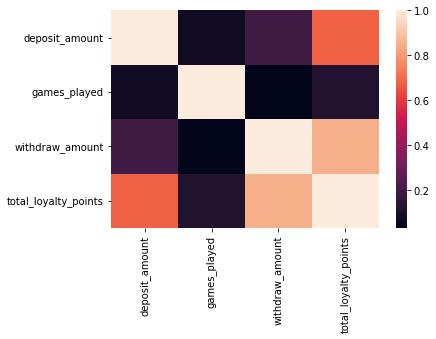

In [24]:
se.heatmap(end_data.corr())

**We find that withdraw amount is highly positive correlated with total loyalty. So, it will be fair to determine how much bonus money should be given to the players based on their withdrawals which indicate the top winners are the highly recommended for the bonus.**

**I suggest to divide the allocated money based on the percentile of the loality.
If player make 20% of the total points of top 50 he gets the same percent from the bonus.**

In [25]:
top50 = end_data.sort_values(by="total_loyalty_points", ascending=False).head(50)
top50["bonus_Rs"] = (top50["total_loyalty_points"] / top50["total_loyalty_points"].sum())*50000
top50.head(10)

,deposit_amount,games_played,withdraw_amount,total_loyalty_points,bonus_Rs
user_id,,,,,
634,515000.0,24.0,17249298.0,90948.882,7104.004872
99,1164800.0,10.0,4034378.0,30996.568,2421.137734
672,2158700.0,10.0,257500.0,23111.500,1805.236139
212,1924981.0,1.0,230000.0,20161.072,1574.778607
566,1819175.0,183.0,360082.0,19868.678,1551.939751
714,1676300.0,6.0,0.0,17354.200,1355.534215
740,1738490.0,2.0,58200.0,17316.300,1352.573851
421,878600.0,1557.0,1421600.0,16136.600,1260.427644
162,68320.0,2.0,2920000.0,15018.520,1173.094566


# Part C: Would you say the loyalty point formula is fair or unfair?

**The loyalty measure formula is very fair, it is not only correlated with withdraw (winning) but also correlated to deposits (fees) which makes it good since to satisfy the high paying customers and the good players too**

**We may add the ratio between deposit an withdraw which will be good metric to determine who is going lose his money and who is going to make money to improve the customer retaining strategy.**

<AxesSubplot:>

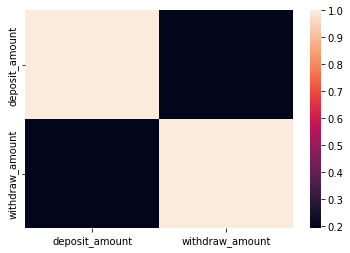

In [26]:
#Activity of the players based on their deposits and withdraws:
se.heatmap(end_data[["deposit_amount","withdraw_amount"]].corr())

Very little correlation between the deposit and withdraw which indicate that high deposit does not means getting more money or the opposite.

In [27]:
top50["action (lose/earn)"] = top50["deposit_amount"]/top50["withdraw_amount"]
top50[top50["action (lose/earn)"]<=1]

,deposit_amount,games_played,withdraw_amount,total_loyalty_points,bonus_Rs,action (lose/earn)
user_id,,,,,,
634,515000.0,24.0,17249298.0,90948.882,7104.004872,0.029856
99,1164800.0,10.0,4034378.0,30996.568,2421.137734,0.288719
421,878600.0,1557.0,1421600.0,16136.600,1260.427644,0.618036
162,68320.0,2.0,2920000.0,15018.520,1173.094566,0.023397
587,671700.0,734.0,1600000.0,14353.800,1121.173377,0.419812
369,650000.0,37.0,1417044.0,13173.288,1028.963744,0.458701
920,367700.0,932.0,1887380.0,13118.400,1024.676450,0.194820
2,567000.0,97.0,1474506.0,12914.530,1008.752192,0.384536
365,311000.0,3667.0,1801136.0,12679.176,990.368722,0.172669


**There are players in Top 50 loyal list where deposit is less than withdraw which is a indication of losing money, so they should have extra bonus for their deposits if exceeded specific limit.**

C:\Users\shard\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deposit_amount', ylabel='total_loyalty_points'>

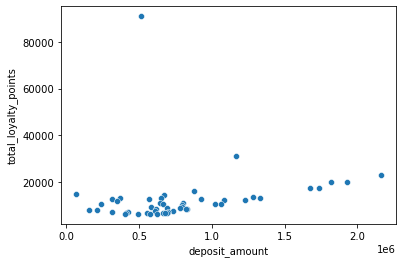

In [28]:
#Top 50 deposits in relation to total points 
se.scatterplot(top50["deposit_amount"], top50["total_loyalty_points"])